In [3]:
import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data=np.zeros((1,3))
for file in glob.glob("plot*.csv"):
    vals=np.genfromtxt(file,comments='#', delimiter=',')
    std=np.ones(vals.shape[0])[:,np.newaxis]
    
    vals=np.append(vals,std,axis=1)
    
    data=np.append(data,vals,axis=0)

data=data[1:]
times=data[:,0]
mags=data[:,1]
mags=mags-(-0.0394*times+24.904)

mags=mags/np.max(np.abs(mags))

times+=2458000.5
times-=np.min(times)

data[:,0]=times
data[:,1]=mags

pd.DataFrame(data,columns=["Time","Magnitude","msig"]).to_csv("BeltonLightcurves.csv")

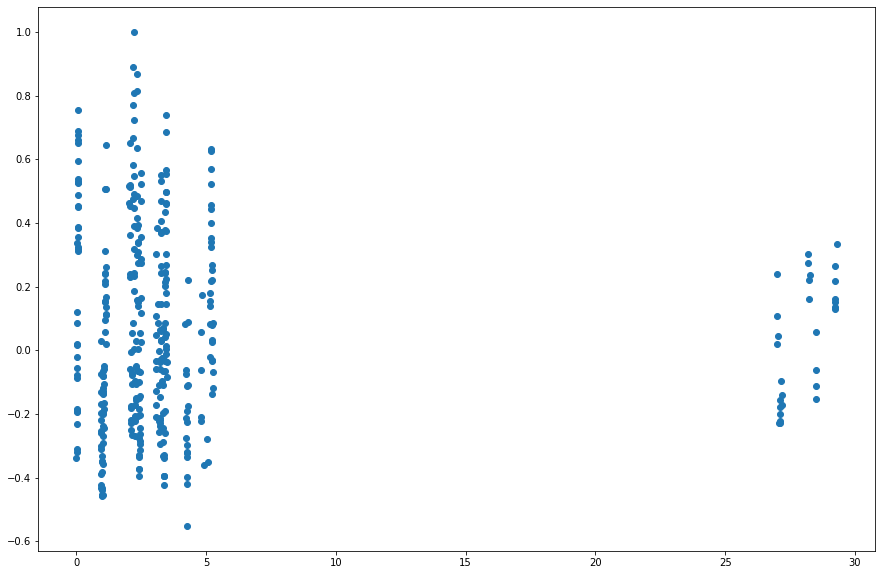

In [51]:
data=pd.read_csv("BeltonLightcurves.csv")

plt.figure(figsize=(15,10))
plt.scatter(times,mags)
plt.show()